<a href="https://colab.research.google.com/github/Hamayah/BT3104_Group_Project/blob/main/BT3104_Group_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brief Description
"Default of Credit Card Clients Dataset"

It contains information about the payment behavior of 30,000 credit card holders from a bank in Taiwan. There are 23 feature attributes (B to X), such as credit limit, payment history, and demographic details, that are used to predict whether a client will default on their next payment. The target variable (column Y) is binary: 0 for "not default" and 1 for "default".

## Data Description
The data modeling problem is to predict the likelihood of credit card default based on these 23 features.

### Attribute Information:
The target is a binary variable and the study uses 23 independent variables to predict the target.

*All dollar amounts are in NT*

* B: Amount of the given credit: it includes both the individual consumer credit and his/her family (supplementary) credit.
* C: Gender (1 = male; 2 = female).
* D: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* E: Marital status (1 = married; 2 = single; 3 = others).
* F: Age (year).
* G - L: History of past payment. Past monthly payment records (from April to September, 2005) as follows: G = the repayment status in September, 2005; H = the repayment status in August, 2005; . . .; L = the repayment status in April, 2005. The measurement scale for the repayment status is:

  -1 = pay duly;

  1 = payment delay for one month;

  2 = payment delay for two months;

  . . .

  8 = payment delay for eight months;

  9 = payment delay for nine months and above.

* M - R: Amount of bill statement. M = amount of bill statement in September, 2005; N = amount of bill statement in August, 2005;

  . . .

  R = amount of bill statement in April, 2005.
* S - X: Amount of previous payment. S = amount paid in September, 2005; T = amount paid in August, 2005;

  . . .
  
  X = amount paid in April, 2005.

## Objective
The goal is to use machine learning models to analyze which factors are significant predictors and to build a model that accurately classifies clients as either "default" or "not default".



# Setup

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!ls /content/drive/MyDrive/bt3104/

'BT3104 Group 1.ipynb'	 card.csv


## Import dataset

In [5]:
import pandas as pd
import numpy as np

column_names = ['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

# Read the data, skipping the first two lines for headers
data = pd.read_csv("/content/drive/MyDrive/bt3104/card.csv", sep=",", skiprows=2, header=None, names = column_names)
print(f"Number of Rows: {data.shape[0]}\nNumber of Columns: {data.shape[1]}")

# Extracting the header (first two lines)
with open("/content/drive/MyDrive/bt3104/card.csv", "r") as f:
    header = [next(f).strip().split(",") for _ in range(2)]

# Setting a random seed for reproducibility
np.random.seed(1234)

# Splitting the data into training and testing sets
n = len(data)
index = np.arange(n)
test_index = np.random.choice(index, size=int(n/4), replace=False)
train_index = np.setdiff1d(index, test_index)

test_data = data.iloc[test_index]
train_data = data.iloc[train_index]

Number of Rows: 30000
Number of Columns: 24


# Exploratory Data Analysis

## Summary Statistics about training data

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings('ignore')

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   B       30000 non-null  int64
 1   C       30000 non-null  int64
 2   D       30000 non-null  int64
 3   E       30000 non-null  int64
 4   F       30000 non-null  int64
 5   G       30000 non-null  int64
 6   H       30000 non-null  int64
 7   I       30000 non-null  int64
 8   J       30000 non-null  int64
 9   K       30000 non-null  int64
 10  L       30000 non-null  int64
 11  M       30000 non-null  int64
 12  N       30000 non-null  int64
 13  O       30000 non-null  int64
 14  P       30000 non-null  int64
 15  Q       30000 non-null  int64
 16  R       30000 non-null  int64
 17  S       30000 non-null  int64
 18  T       30000 non-null  int64
 19  U       30000 non-null  int64
 20  V       30000 non-null  int64
 21  W       30000 non-null  int64
 22  X       30000 non-null  int64
 23  Y       30000 no

In [7]:
data.head()

,B,C,D,E,F,G,H,I,J,K,...,P,Q,R,S,T,U,V,W,X,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
data.describe()

,B,C,D,E,F,G,H,I,J,K,...,P,Q,R,S,T,U,V,W,X,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## Dependent Variable

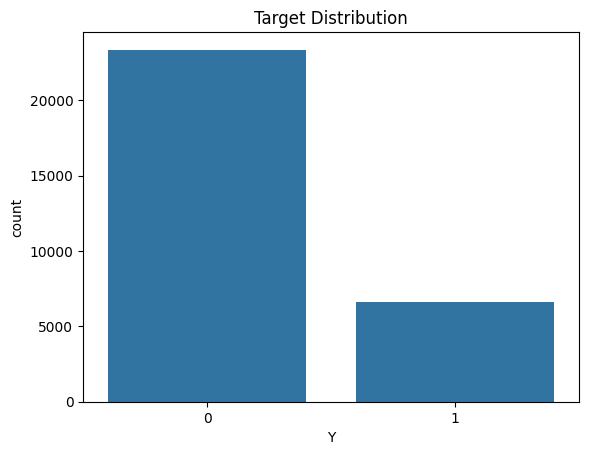

In [9]:
sns.countplot(x='Y', data=data)
plt.title('Target Distribution')
plt.show()

### Percentage of defaulters

In [10]:
total_rows = len(data)
print("Default split:", data['Y'].value_counts())
non_default = data['Y'].value_counts()[0] # 0 for not default
default = data['Y'].value_counts()[1] # 1 for default

total_default = default/total_rows
total_non_default = non_default/total_rows

print(f"\nDefault: {round(total_default * 100, 2)}%")
print(f"Non-Default: {round(total_non_default * 100, 2)}%")

Default split: Y
0    23364
1     6636
Name: count, dtype: int64

Default: 22.12%
Non-Default: 77.88%


## Independent Variables

### Correlation between variables

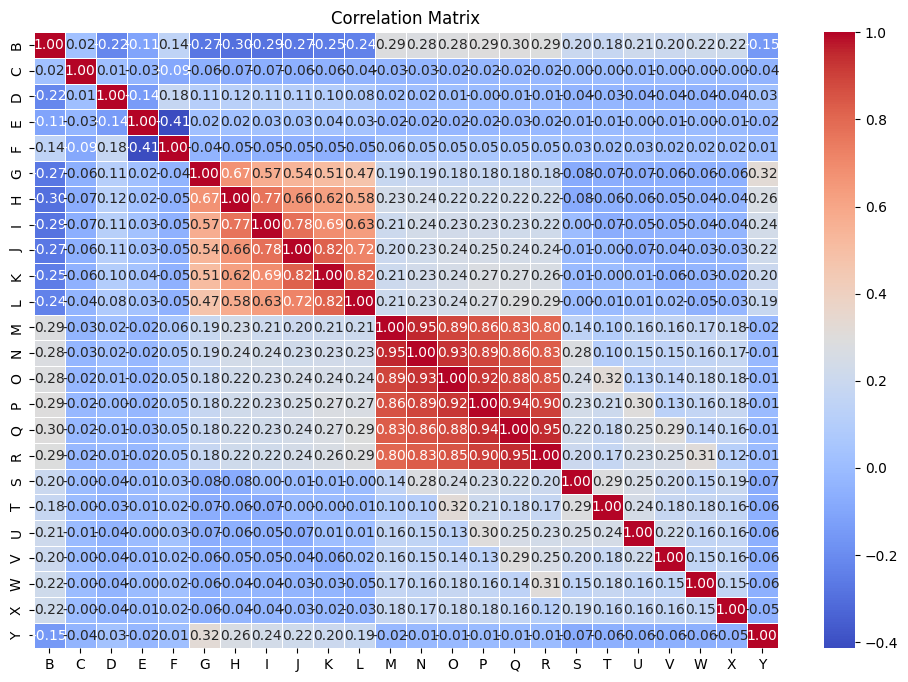

In [11]:
# Correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Categorical Features

#### Sex
1 => Male

2 => Female

In [12]:
data['C'].value_counts()

,count
C,
2,18112
1,11888


#### Education
1 => Graduate School

2 => University

3 => High School

4 => Others

In [13]:
data['D'].value_counts()

,count
D,
2,14030
1,10585
3,4917
5,280
4,123
6,51
0,14


Since the data set has unknown values (5, 6 and 0) without any description, we will proceed to class it into 4 which is Others.

In [14]:
unknown_education = (data['D'] == 5) | (data['D'] == 6) | (data['D'] == 0)
data.loc[unknown_education, 'D'] = 4
data['D'].value_counts()

,count
D,
2,14030
1,10585
3,4917
4,468


#### Marriage
1 => Married

2 => Single

3 => Others

In [15]:
data['E'].value_counts()

,count
E,
2,15964
1,13659
3,323
0,54


Again, there are unknown marriage values (0), so we will be adding them into the category 3 which is Others

In [16]:
data.loc[data['E'] == 0, 'E'] = 3
data['E'].value_counts()

,count
E,
2,15964
1,13659
3,377


#### Categorical Features plot

<Figure size 1000x500 with 0 Axes>

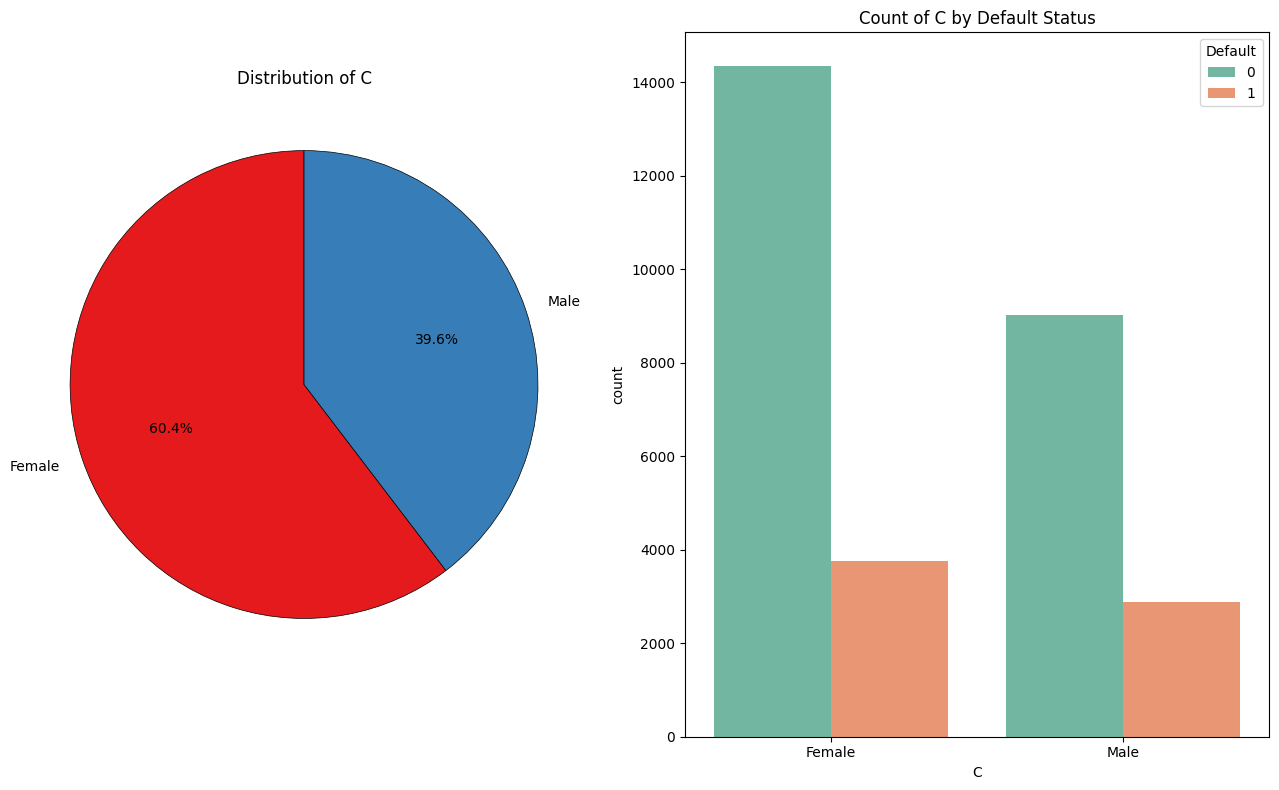

<Figure size 1000x500 with 0 Axes>

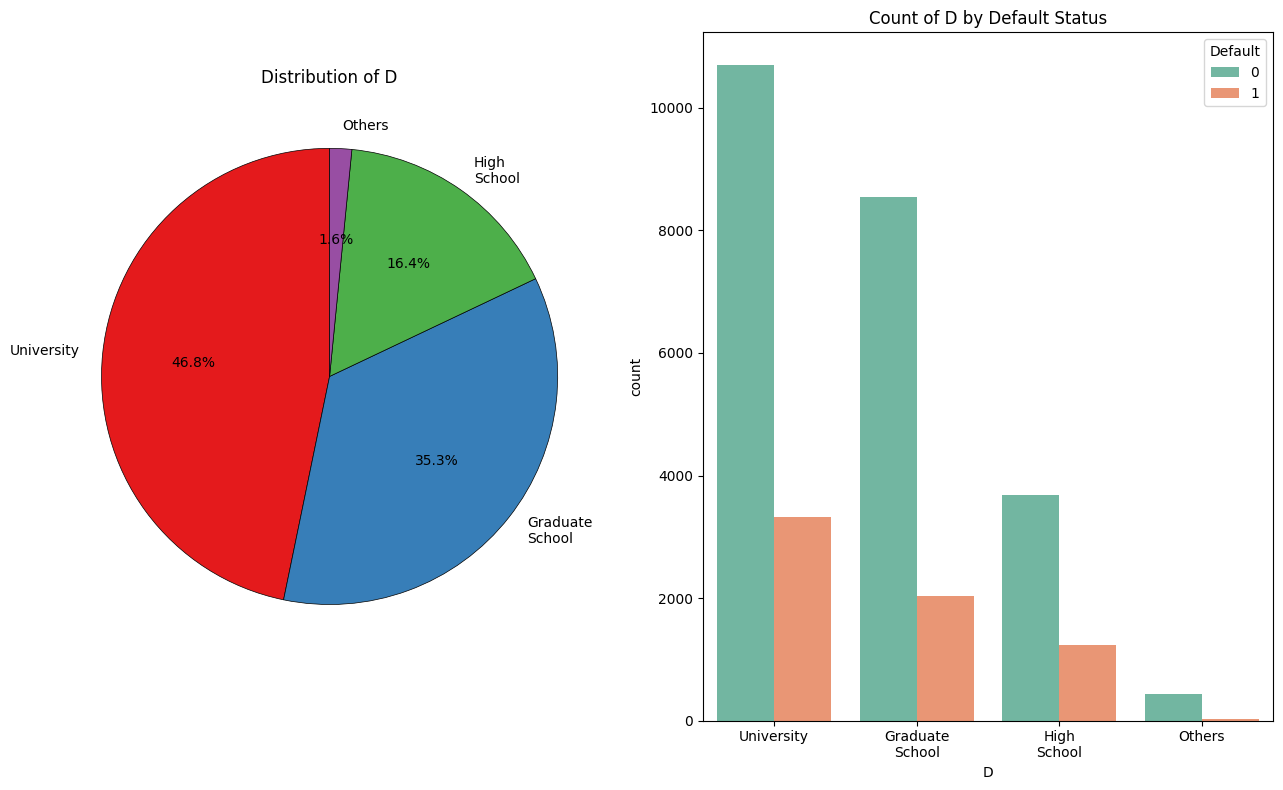

<Figure size 1000x500 with 0 Axes>

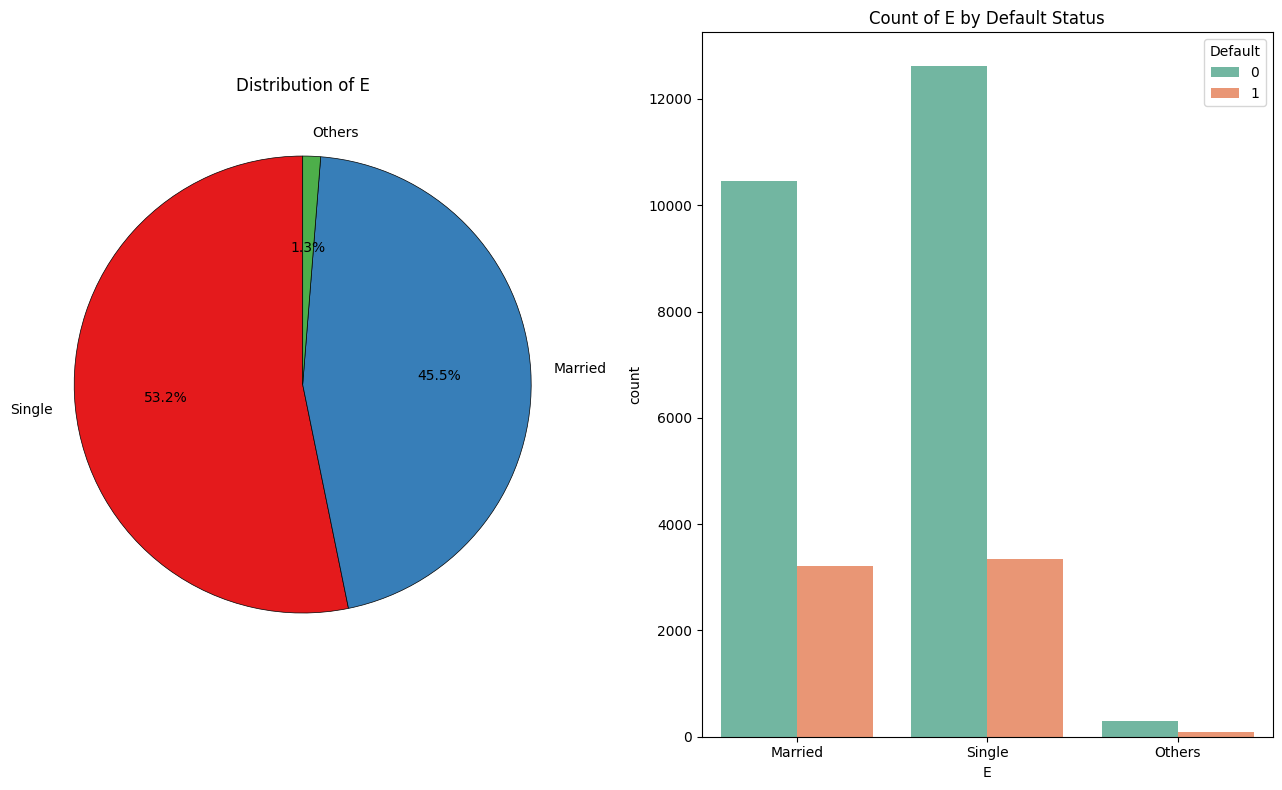

In [17]:
categorical_features = ['C', 'D', 'E']
data_cat = data[categorical_features]
data_cat['Default'] = data['Y']

data_cat.replace({
    'C': {
        1 : 'Male',
        2 : 'Female'
        },
    'D': {
        1 : 'Graduate\nSchool',
        2 : 'University',
        3 : 'High\nSchool',
        4 : 'Others'
        },
    'E': {
        1 : 'Married',
        2 : 'Single',
        3 : 'Others'}
      }, inplace = True)

for col in categorical_features:
    plt.figure(figsize=(10, 5))
    fig, axes = plt.subplots(ncols=2, figsize=(13, 8))

    # Pie Chart
    data_cat[col].value_counts().plot(
        kind="pie",
        ax=axes[0],
        subplots=True,
        autopct='%1.1f%%',
        colors=sns.color_palette("Set1"),
        startangle=90,
        wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'}
    )
    axes[0].set_ylabel('')  # Remove y-label for better visualization
    axes[0].set_title(f'Distribution of {col}')

    # Bar Chart
    sns.countplot(
        x=col,
        hue='Default',
        data=data_cat,
        ax=axes[1],
        palette="Set2"
    )
    axes[1].set_title(f'Count of {col} by Default Status')

    plt.tight_layout()
    plt.show()

From the three plots we are able to make observations about the class of people who default on their credit card payments.
1. There are more female credit card holders, so there is a higher proportion of defaulters who are females
2. The number of defaulters have a higher proportion of educated people in the graduate school and university category.
3. There are more singles who are defaulters than married individuals

#### Age

<Axes: xlabel='F', ylabel='count'>

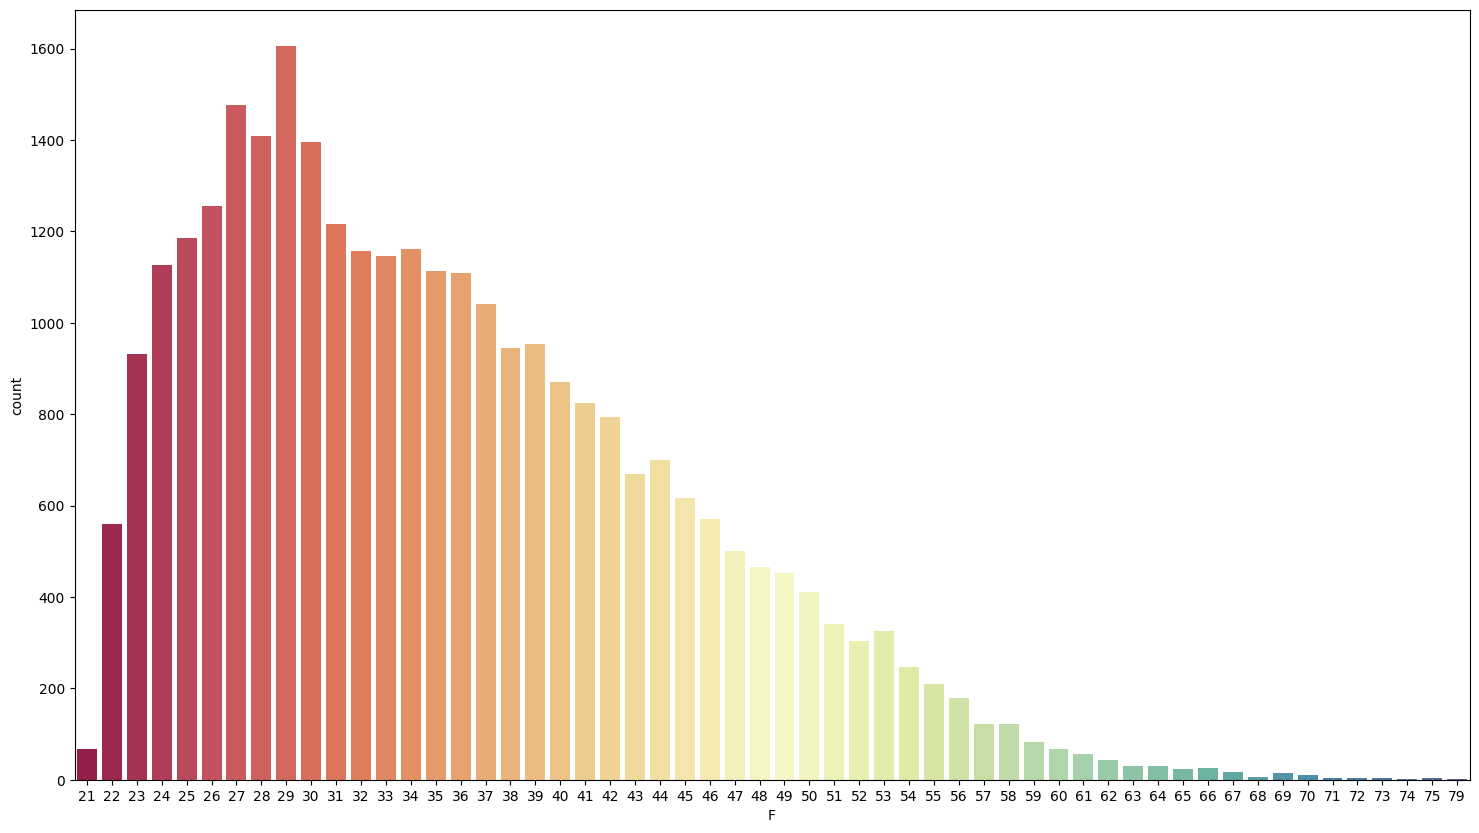

In [18]:
age_index = data['F'].value_counts().reset_index()

plt.figure(figsize=(18, 10))

sns.barplot(
    x="F",
    y="count",
    data=age_index,
    palette="Spectral",
    orient="v"
)

Distribution of number of defaulters by age show a left skewed graph with larger concentration of defaulters in the age range between 27 to 30, and tails off as age increases.

#### Bill Amount

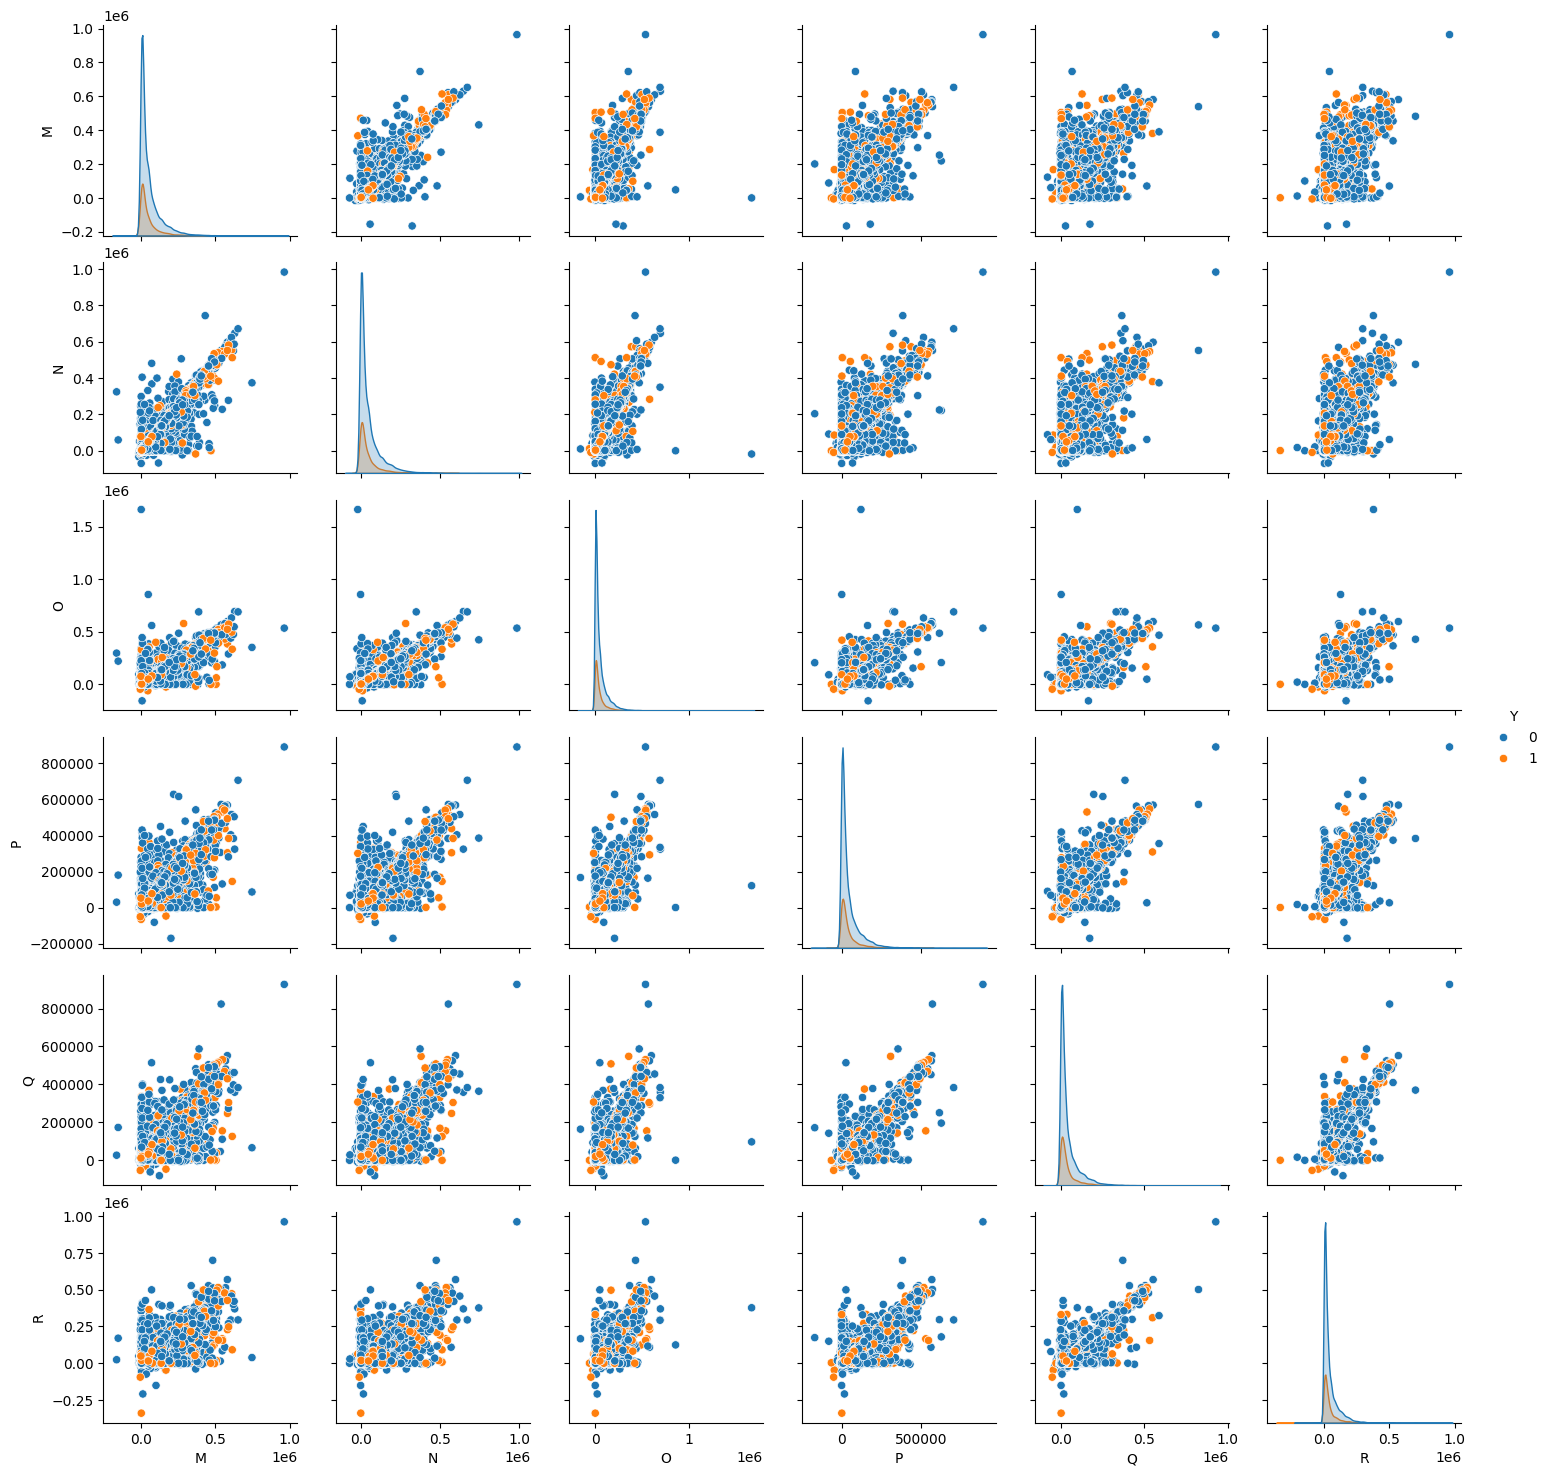

In [19]:
# sns.pairplot(data, hue='Y', vars=['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X'])
sns.pairplot(data, hue='Y', vars=['M', 'N', 'O', 'P', 'Q', 'R'])
plt.show()

#### Pay Amount

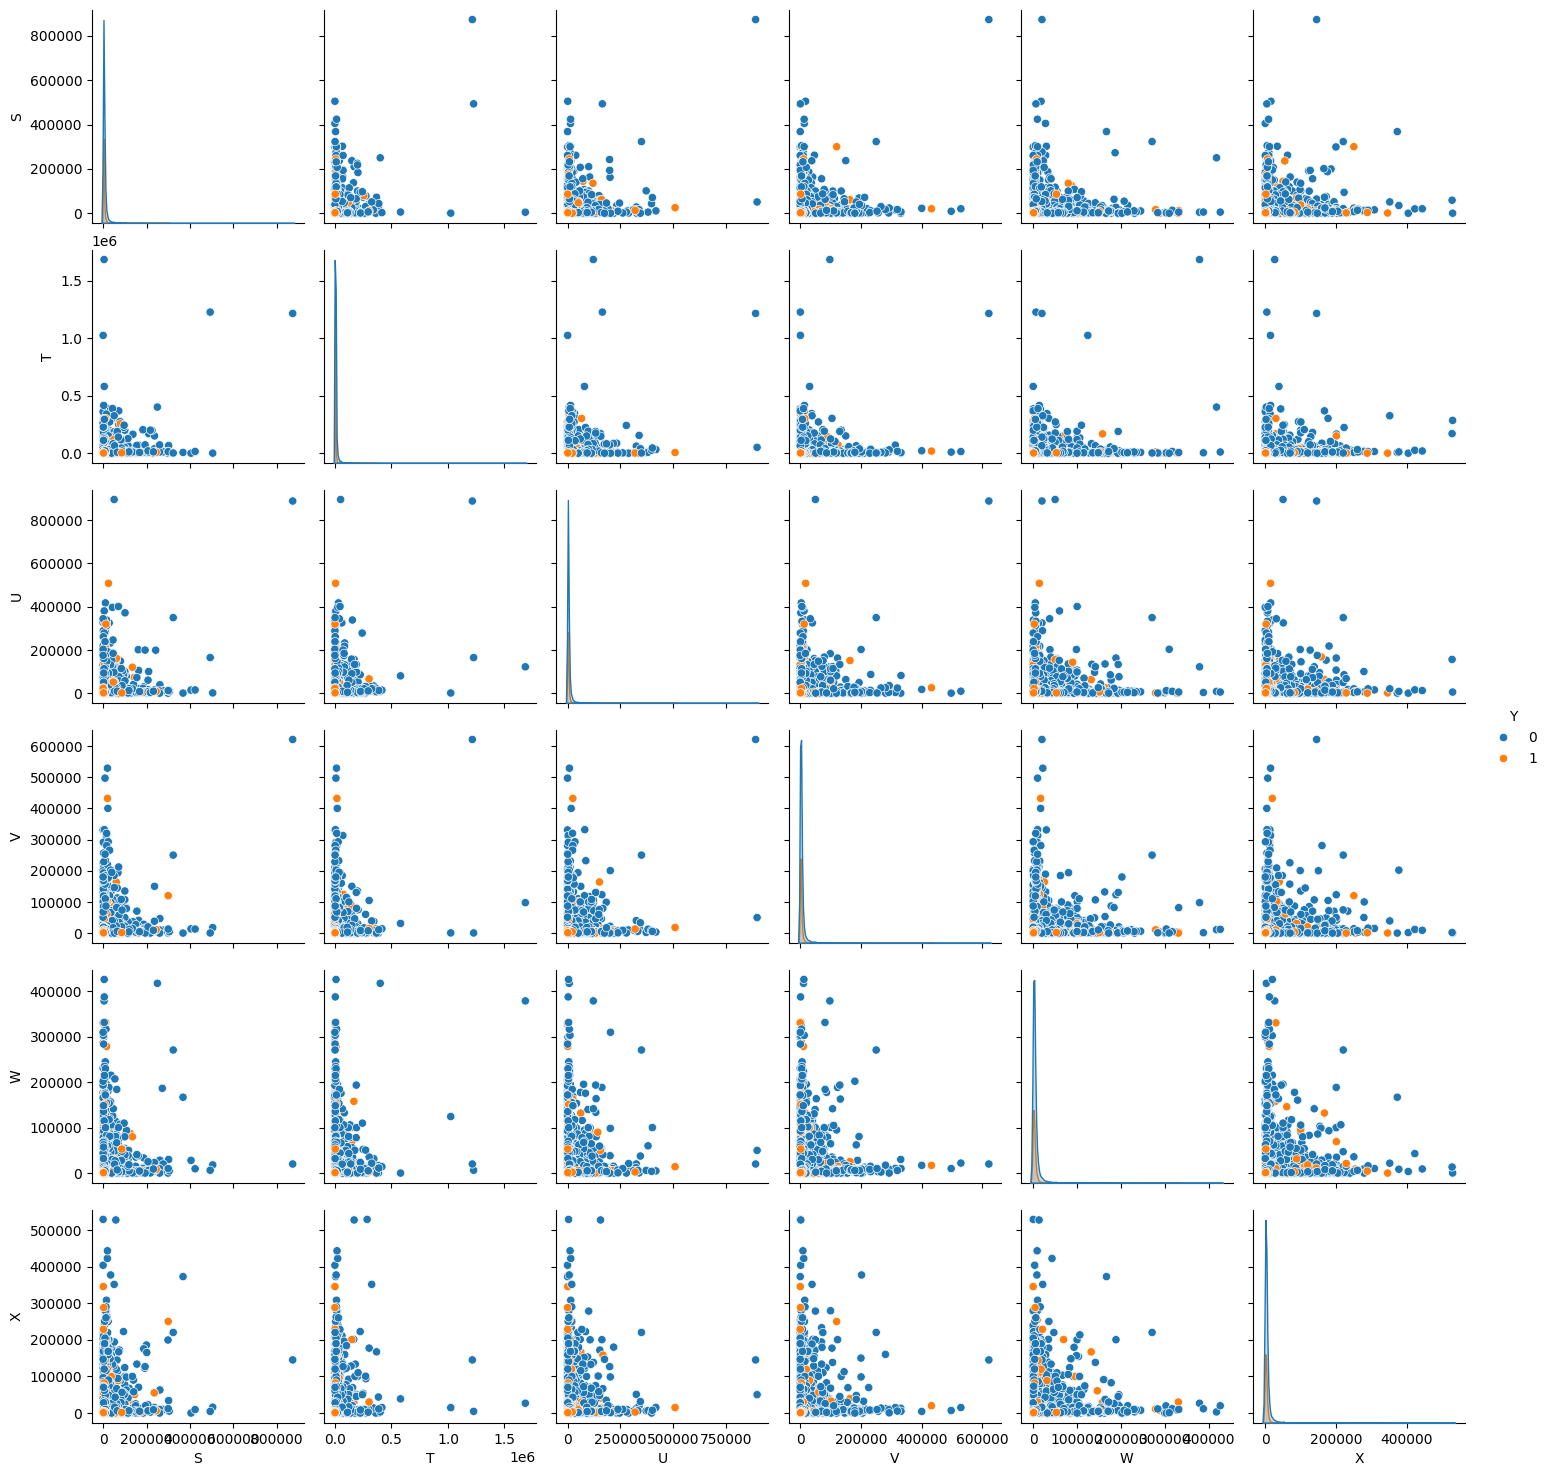

In [20]:
sns.pairplot(data, hue='Y', vars=['S', 'T', 'U', 'V', 'W', 'X'])
plt.show()

# Data Preprocessing

## Check for missing values

In [21]:
print(data.isnull().sum())

B    0
C    0
D    0
E    0
F    0
G    0
H    0
I    0
J    0
K    0
L    0
M    0
N    0
O    0
P    0
Q    0
R    0
S    0
T    0
U    0
V    0
W    0
X    0
Y    0
dtype: int64


The data has no NA values.

## Data transformation

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

# Apply Standard Scaler
scaler = StandardScaler() # Initial usage first, change to MinMaxScaler later to see if model can benefit from different normalization technique
# scaler = MinMaxScaler()
# scaler = MaxAbsScaler()

# Selecting all columns except the target column 'Y'
features = data.iloc[:, :-1]
target = data['Y']

# Fit and transform the features using MinMaxScaler
features_scaled = scaler.fit_transform(features)

# Create a DataFrame with scaled features
data_scaled = pd.DataFrame(features_scaled, columns=column_names[:-1])
data_scaled['Y'] = target.values

data_scaled.head()

,B,C,D,E,F,G,H,I,J,K,...,P,Q,R,S,T,U,V,W,X,Y
0,-1.136720,0.810161,0.21187,-1.068797,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,...,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1
1,-0.365981,0.810161,0.21187,0.849131,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,...,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1
2,-0.597202,0.810161,0.21187,0.849131,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,...,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0
3,-0.905498,0.810161,0.21187,-1.068797,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,...,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0
4,-0.905498,-1.234323,0.21187,-1.068797,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,...,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0


In [23]:
data_scaled.tail()

,B,C,D,E,F,G,H,I,J,K,...,P,Q,R,S,T,U,V,W,X,Y
29995,0.404759,-1.234323,1.555086,-1.068797,0.381275,0.014861,0.111736,0.138865,0.188746,0.234917,...,0.695474,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130,0
29996,-0.134759,-1.234323,1.555086,0.849131,0.815221,-0.874991,-0.723570,-0.696663,-0.666599,0.234917,...,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382,0
29997,-1.059646,-1.234323,0.211870,0.849131,0.164303,3.574267,2.617654,1.809921,-0.666599,0.234917,...,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001,1
29998,-0.674276,-1.234323,1.555086,-1.068797,0.598248,0.904712,-0.723570,0.138865,0.188746,0.234917,...,0.147844,-0.468063,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904,1
29999,-0.905498,-1.234323,0.211870,-1.068797,1.140680,0.014861,0.111736,0.138865,0.188746,0.234917,...,-0.104582,-0.129669,-0.395592,-0.216481,-0.178866,-0.215582,-0.244230,-0.248683,-0.237130,1


In [24]:
data_scaled.describe()

,B,C,D,E,F,G,H,I,J,K,...,P,Q,R,S,T,U,V,W,X,Y
count,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,...,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,30000.000000
mean,-6.063298e-17,2.330580e-16,-7.010688e-17,1.023182e-16,-1.856885e-16,-1.894781e-17,4.926430e-17,-5.494864e-17,3.126388e-17,-3.031649e-17,...,5.873820e-17,-2.368476e-17,1.136868e-17,-4.736952e-18,1.373716e-17,2.084259e-17,1.800042e-17,-1.965835e-17,-1.788199e-17,0.221200
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,...,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,0.415062
min,-1.213794e+00,-1.234323e+00,-1.131346e+00,-1.068797e+00,-1.571479e+00,-1.764843e+00,-1.558876e+00,-1.532192e+00,-1.521944e+00,-1.530046e+00,...,-3.315048e+00,-2.000874e+00,-6.355247e+00,-3.419416e-01,-2.569895e-01,-2.968013e-01,-3.080626e-01,-3.141361e-01,-2.933821e-01,0.000000
25%,-9.054983e-01,-1.234323e+00,-1.131346e+00,-1.068797e+00,-8.120745e-01,-8.749911e-01,-7.235699e-01,-6.966635e-01,-6.665987e-01,-6.475648e-01,...,-6.363293e-01,-6.340600e-01,-6.316338e-01,-2.815661e-01,-2.208358e-01,-2.746506e-01,-2.891680e-01,-2.976091e-01,-2.867584e-01,0.000000
50%,-2.118326e-01,8.101607e-01,2.118699e-01,8.491306e-01,-1.611565e-01,1.486052e-02,1.117361e-01,1.388648e-01,1.887461e-01,2.349165e-01,...,-3.763451e-01,-3.652683e-01,-3.660725e-01,-2.151530e-01,-1.697952e-01,-1.945673e-01,-2.123132e-01,-2.159561e-01,-2.090042e-01,0.000000
75%,5.589071e-01,8.101607e-01,2.118699e-01,8.491306e-01,5.982479e-01,1.486052e-02,1.117361e-01,1.388648e-01,1.887461e-01,2.349165e-01,...,1.747667e-01,1.624955e-01,1.733997e-01,-3.970176e-02,-3.998021e-02,-4.093230e-02,-5.188511e-02,-5.026084e-02,-6.837436e-02,0.000000
max,6.416528e+00,8.101607e-01,2.898301e+00,2.767058e+00,4.720729e+00,7.133674e+00,6.794184e+00,6.823091e+00,7.031505e+00,7.294767e+00,...,1.318669e+01,1.458743e+01,1.549528e+01,5.239921e+01,7.284299e+01,5.059528e+01,3.933218e+01,2.760363e+01,2.944510e+01,1.000000


## Feature Selection

For feature selection, the filter method is chosen since the dataset is large with large number of attributes. For the continuous variables, correlation between each of these variables and the target variable is used and the threshold value is set as 0.1. For categorical variables 'C', 'D', and 'E', the Pearson statistic is used to meansure its association with the target variable.

In [25]:
# filter method is used since dataset is large with large number of attributes
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, mutual_info_classif

X_continuous = data_scaled[['B', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X']]
y = data_scaled['Y']

correlation_threshold = 0.1
correlation_with_target = X_continuous.corrwith(y)
selected_features_corr = correlation_with_target[abs(correlation_with_target) > correlation_threshold].index
print("Selected Features by Correlation with Target:", selected_features_corr)

Selected Features by Correlation with Target: Index(['B', 'G', 'H', 'I', 'J', 'K', 'L'], dtype='object')


In [26]:
from sklearn.feature_selection import chi2, SelectKBest

X_categorical = data[['C', 'D', 'E']]
X_categorical_encoded = pd.get_dummies(X_categorical, drop_first=True)
chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X_categorical_encoded, y)
chi2_scores = chi2_selector.scores_
chi2_pvalues = chi2_selector.pvalues_
chi2_results = pd.DataFrame({
    'Feature': X_categorical_encoded.columns,
    'Chi2 Score': chi2_scores,
    'p-Value': chi2_pvalues
})

chi2_results = chi2_results.sort_values(by='Chi2 Score', ascending=False)
print(chi2_results)

  Feature  Chi2 Score   p-Value
1       D   10.337016  0.001304
0       C    7.146367  0.007512
2       E    3.982131  0.045985


Since p-value < 0.05 for 'C' and 'D', these 2 attributes are associated with target variable.

In [27]:
selected_features = ['B', 'C', 'D', 'G', 'H', 'I', 'J', 'K', 'L', 'Y']
data_selected = data_scaled[selected_features]
data_selected.head()

,B,C,D,G,H,I,J,K,L,Y
0,-1.136720,0.810161,0.21187,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,1
1,-0.365981,0.810161,0.21187,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,1
2,-0.597202,0.810161,0.21187,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,0
3,-0.905498,0.810161,0.21187,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,0
4,-0.905498,-1.234323,0.21187,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,0


### Assessing normalization techniques
#### Dataset Characteristics

The dataset contains information such as credit limits, payments, age, and other demographic variables. Key characteristics that inform our choice of normalization method include:

1. **Wide Range of Values**: Financial features such as balances and payments have a significantly larger range than other categorical features like education or marital status.

2. **Presence of Outliers**: Financial data often contains extreme values, such as unusually high balances or payments, which can heavily influence some normalization techniques.

3. **Feature Sensitivity**: The dataset contains both categorical and continuous variables, necessitating careful normalization to ensure that no feature dominates due to its scale.

#### Normalization Techniques

1. StandardScaler
2. MinMaxScaler
3. MaxAbsScaler

#### Comparison and Recommendation

Given the wide range of feature values and the likely presence of outliers, the most suitable approach for the initial phase of feature selection and model training is to use **StandardScaler**. This decision is motivated by the following considerations:

* **Variance Reduction**: StandardScaler reduces the influence of features with a larger variance, which is crucial when certain features (e.g., high balances or payments) could otherwise dominate others during model training.

* **Handling Outliers**: StandardScaler is less influenced by extreme values compared to MinMaxScaler, making it a more stable option given the presence of potential outliers in financial data.

* **Algorithm Suitability**: Many feature selection and parameter estimation techniques, such as PCA and SVM, assume that data is standardized. StandardScaler aligns well with these assumptions.

After conducting initial feature selection and model training with **StandardScaler**, we can evaluate model performance and determine if switching to **MinMaxScaler** might improve results. This alternative normalization could benefit models that are more sensitive to input magnitude, such as Neural Networks, and if we determine that the dataset does not contain problematic outliers.

# Model Selection

Possible models to use:
1. Naive Bayes
2. SVM
3. Logistic Regression
4. Gradient Boosting Classifier

Can add or remove if necessary.

In [28]:
train_data = data_selected.iloc[train_index]
test_data = data_selected.iloc[test_index]

X_train = train_data.drop('Y', axis=1)
y_train = train_data['Y']
X_test = test_data.drop('Y', axis=1)
y_test = test_data['Y']


In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Define models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True),
    'Naive Bayes': GaussianNB(),
}

cv_results = {}
for model_name, model in models.items():
    cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    cv_results[model_name] = cv_score.mean()
    print(f"{model_name}: Average AUC-ROC Score: {cv_score.mean():.4f}")

# Example of Hyperparameter tuning for SVM (you can add for others similarly)
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}
grid_search_svm = GridSearchCV(SVC(probability=True), param_grid_svm, cv=5, scoring='roc_auc')
grid_search_svm.fit(X_train, y_train)

print("Best SVM Parameters:", grid_search_svm.best_params_)

# Final model evaluation on the test set with the best SVM model
best_svm_model = grid_search_svm.best_estimator_
y_pred_svm = best_svm_model.predict(X_test)
y_pred_proba_svm = best_svm_model.predict_proba(X_test)[:, 1]

# Calculate metrics for the best SVM model
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)
roc_auc = roc_auc_score(y_test, y_pred_proba_svm)

print("\nBest SVM Model Test Performance:")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")
print(f"Test AUC-ROC: {roc_auc:.4f}")

Logistic Regression: Average AUC-ROC Score: 0.7127
Gradient Boosting: Average AUC-ROC Score: 0.7664
SVM: Average AUC-ROC Score: 0.6975
Naive Bayes: Average AUC-ROC Score: 0.7374
